In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing()


In [ ]:
df.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
type(df)

sklearn.utils._bunch.Bunch

In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(df.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


###**Preparing Datset**

In [ ]:
dataset = pd.DataFrame(df.data, columns=df.feature_names)

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
dataset['PRICE']=df.target

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
##checking stats summary in data
dataset.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
##checking null values

dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

### **Exploratory Data Analysis**

<Axes: >

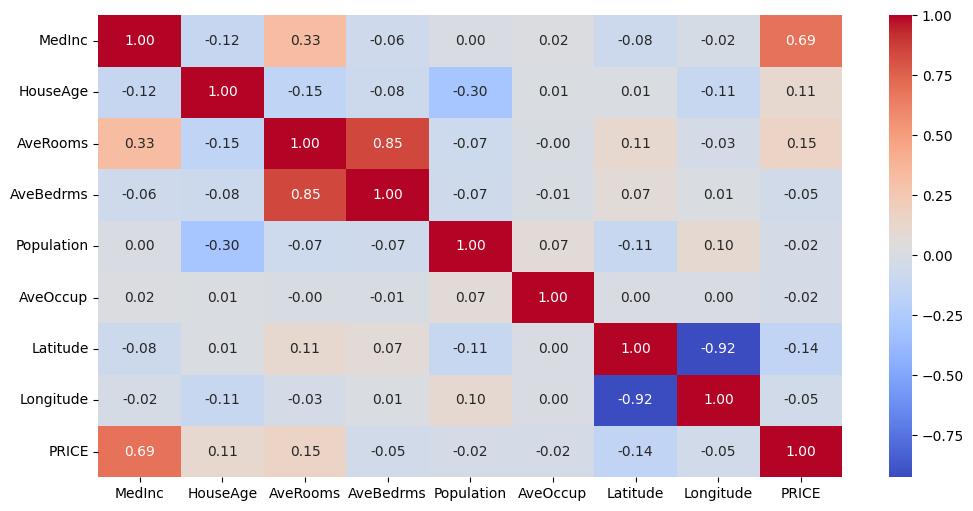

In [ ]:
## correlation
correlation = dataset.corr()

plt.figure(figsize=(12,6))

sns.heatmap(correlation, annot=True, fmt='.2f',cmap='coolwarm')

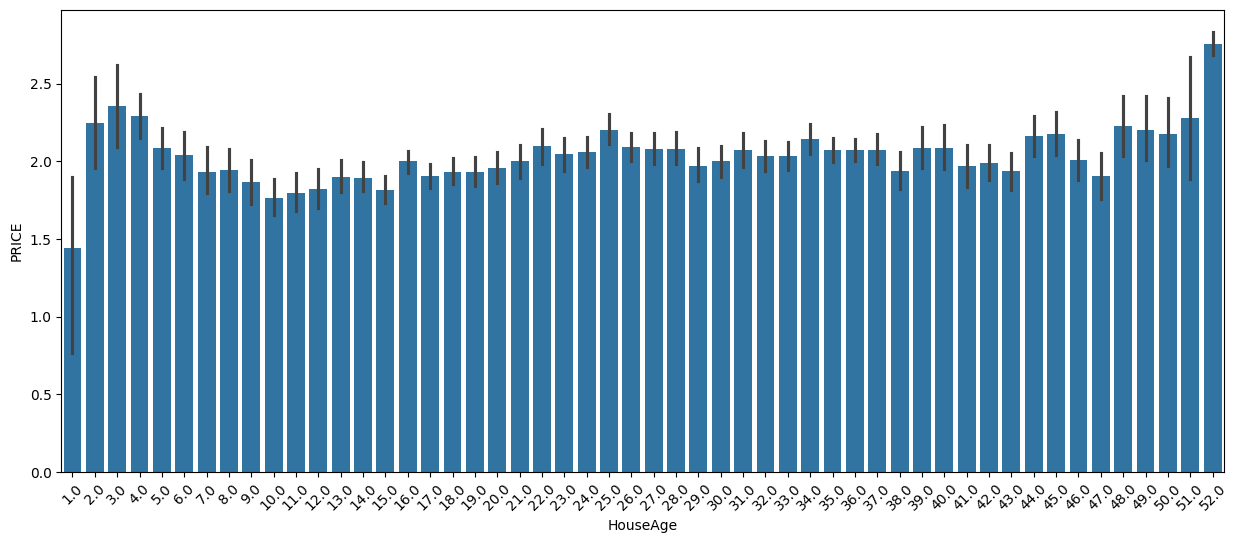

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=dataset,x='HouseAge',y='PRICE')
plt.xticks(rotation=45)
plt.show()

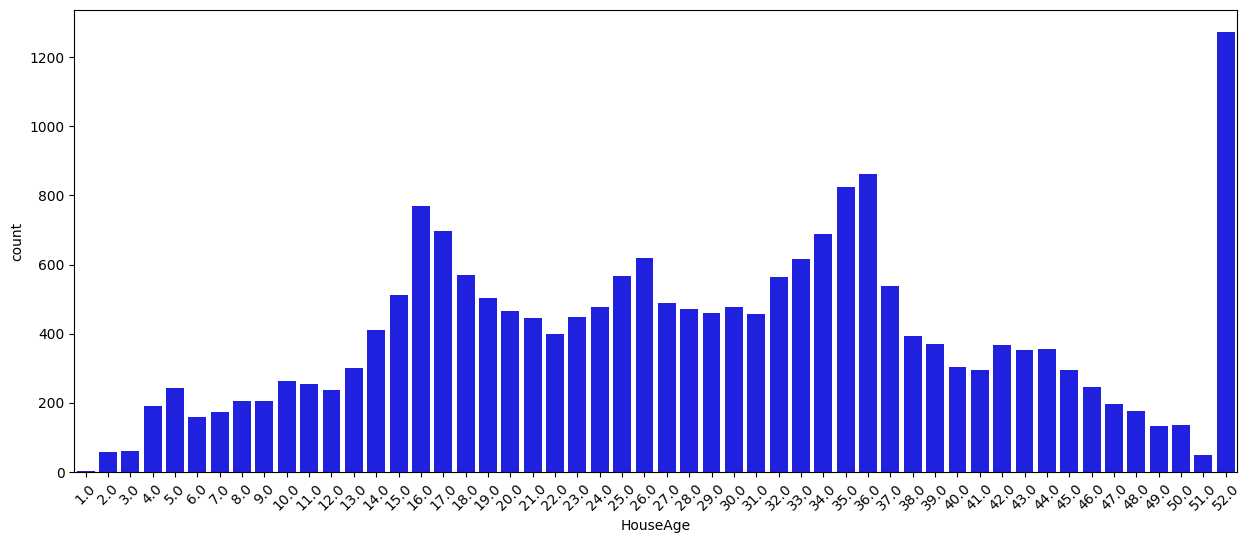

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=dataset,x='HouseAge',color='blue')
plt.xticks(rotation=45)
plt.show()

### Outliers

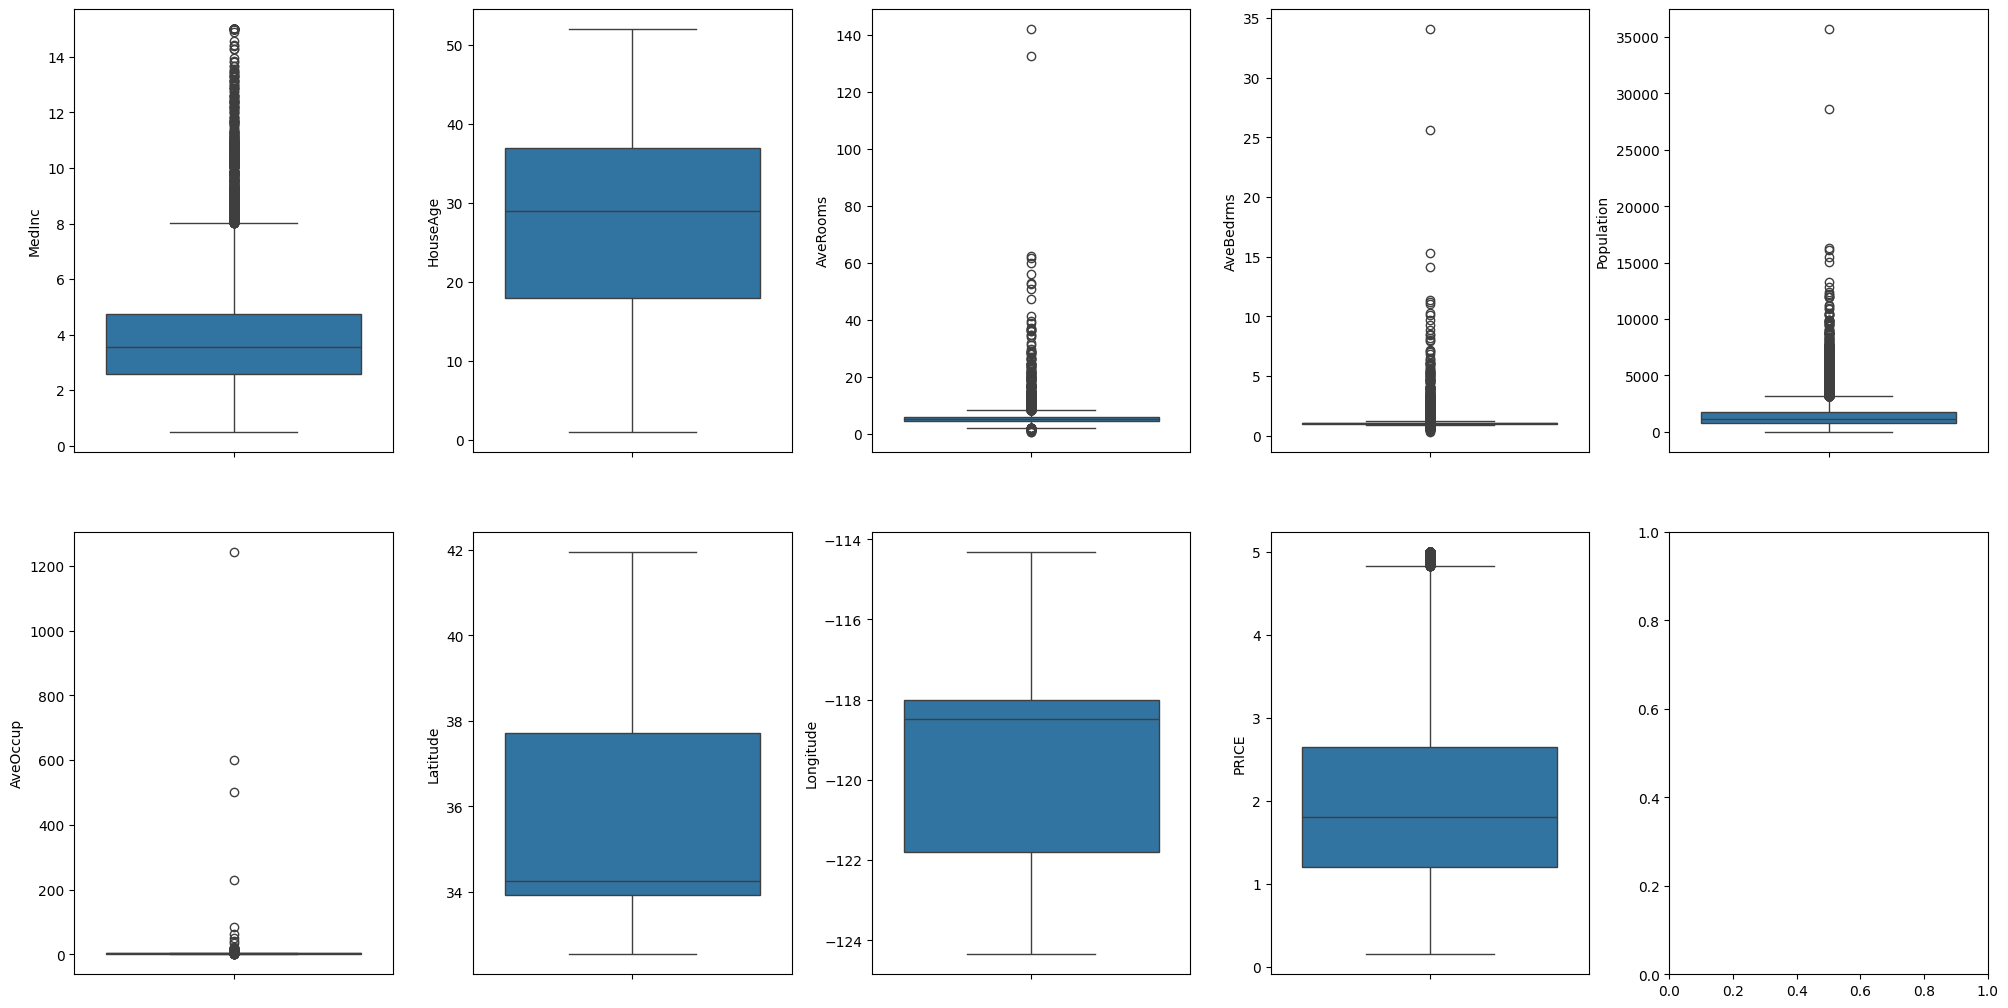

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,10))

axs = axs.flatten()

for index,(feature, values) in enumerate(dataset.items()):
  sns.boxplot(y=values, data=dataset, ax=axs[index])


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# function to remove outliers

def rem_outliers(dataset,column):
  q1 = dataset[column].quantile(0.25)
  q3 = dataset[column].quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  outliers = dataset[(dataset[column]<lower_bound)|(dataset[column]>upper_bound)]

  num_outliers = outliers.shape[0]
  print(f'column{feature} - Number of outliers : {num_outliers}')

  dataset = dataset[~dataset.index.isin(outliers.index)]

  return dataset



In [ ]:
for column in dataset.columns:
  dataset = rem_outliers(dataset,column)


columnPRICE - Number of outliers : 681
columnPRICE - Number of outliers : 0
columnPRICE - Number of outliers : 439
columnPRICE - Number of outliers : 1116
columnPRICE - Number of outliers : 1063
columnPRICE - Number of outliers : 528
columnPRICE - Number of outliers : 0
columnPRICE - Number of outliers : 0
columnPRICE - Number of outliers : 581


In [ ]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


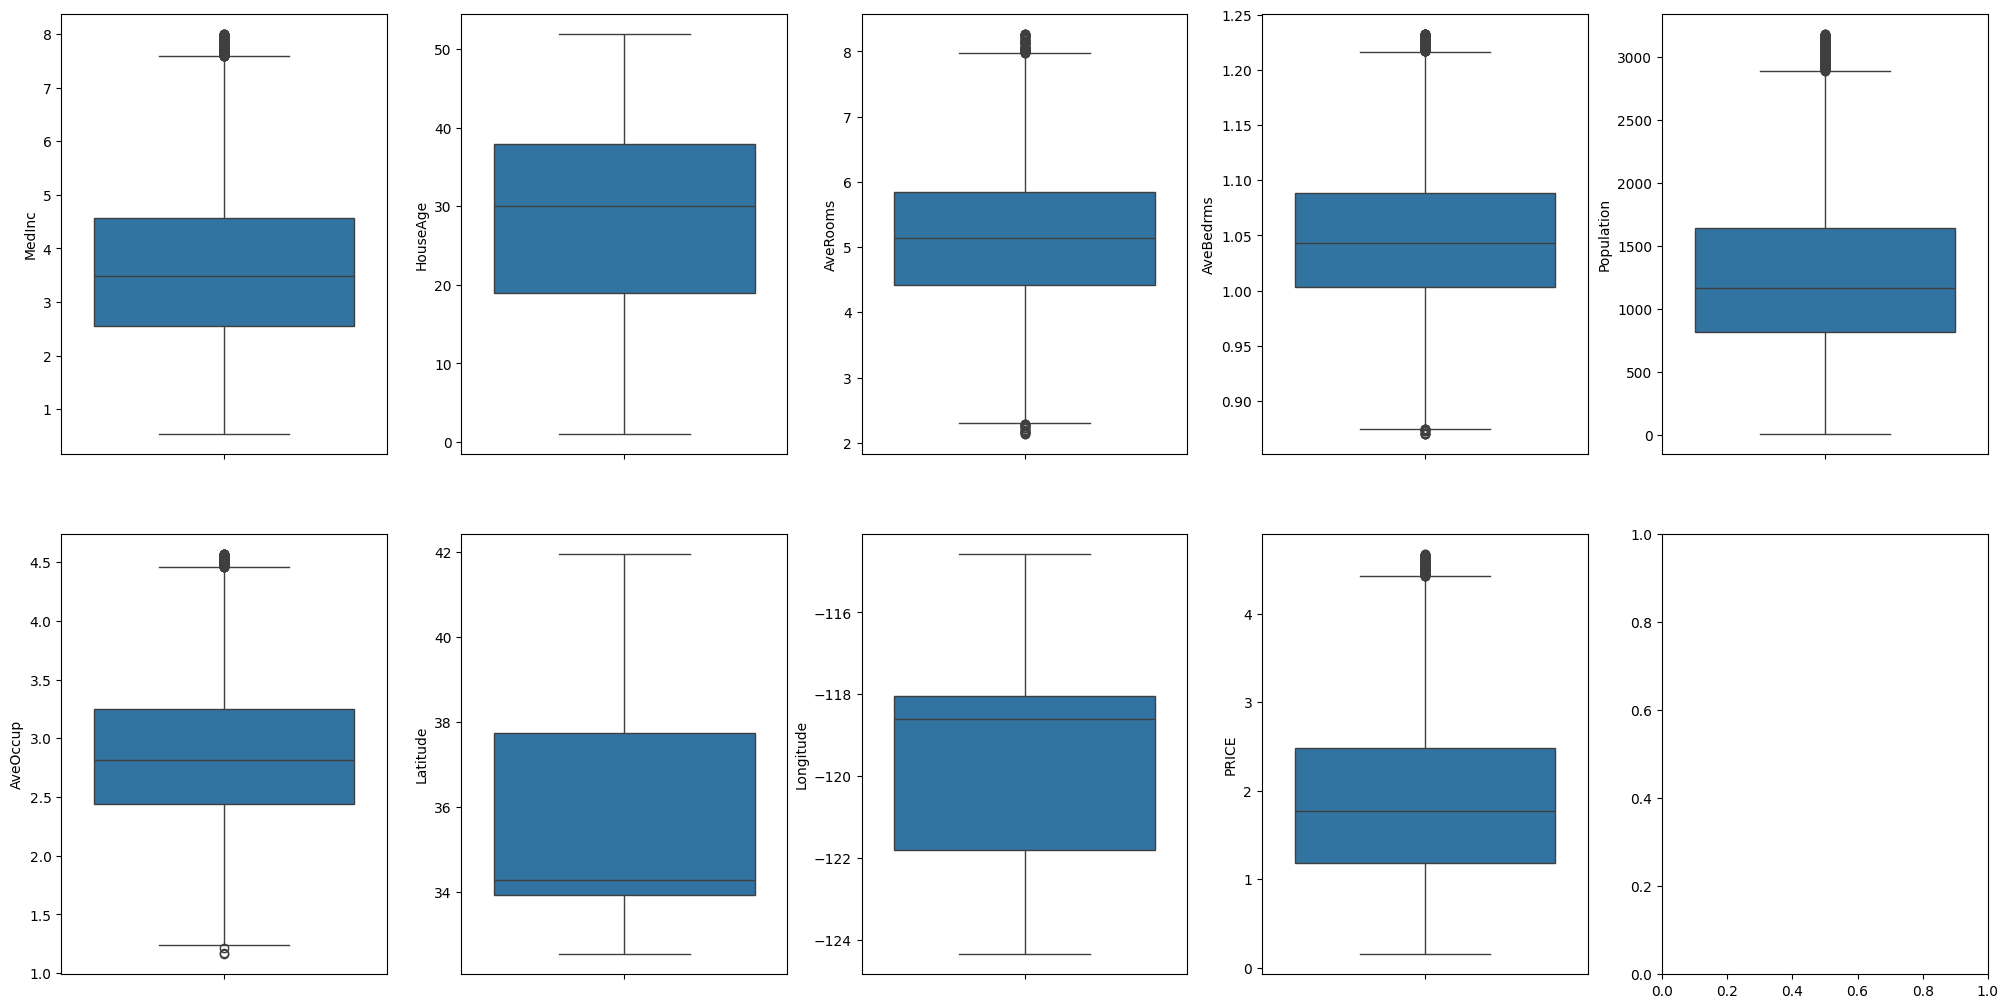

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20,10))

axs = axs.flatten()

for index,(feature, values) in enumerate(dataset.items()):
  sns.boxplot(y=values, data=dataset, ax=axs[index])


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()

Determining feature and target variable

In [ ]:
X = dataset.drop('PRICE', axis=1)
y = dataset['PRICE']

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

3        3.413
4        3.422
5        2.697
6        2.992
7        2.414
         ...  
20634    1.168
20635    0.781
20637    0.923
20638    0.847
20639    0.894
Name: PRICE, Length: 16232, dtype: float64

Split train-test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((12985, 8), (12985,), (3247, 8), (3247,))

Model selection and training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Regression = LinearRegression()

In [ ]:
Regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred= Regression.predict(X_test)

In [ ]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred }).head(5)

,Y_Test,Y_Pred
7794,1.536,1.498897
9480,0.715,0.943537
9273,4.232,2.945654
11949,1.141,1.653280
13831,1.678,1.887395


In [ ]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
score = metrics.r2_score(y_test,y_pred)

pd.DataFrame([MAE, MSE, RMSE,score], index=['MAE', 'MSE', 'RMSE','score'], columns=['Metrics'])


,Metrics
MAE,0.424568
MSE,0.314676
RMSE,0.560960
score,0.624179


In [ ]:
df.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

### Pickling the model file for deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(Regression,open('reg_model.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('reg_model.pkl','rb'))

In [ ]:
## Prediction

pickled_model.predict(df.data[0].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.07024249])